In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/data.csv'
df = pd.read_csv(file_path)

# Display the first few rows and check the columns
print(df.head())
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

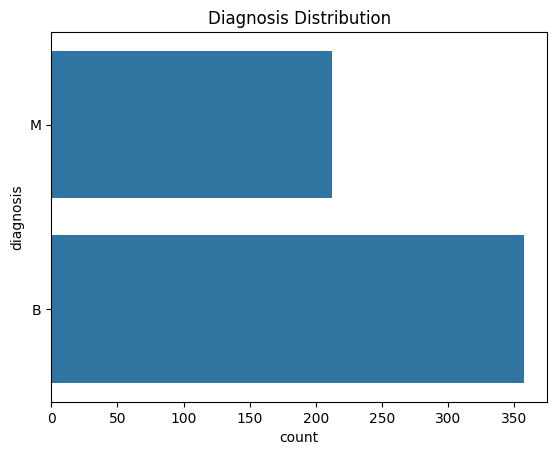

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic statistics of numerical columns
print(df.describe())

# Check class distribution
sns.countplot(df['diagnosis'])
plt.title('Diagnosis Distribution')
plt.show()






In [ ]:
# Assuming selecting relevant features for training the model
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'compactness_mean', 'area_mean',
                     'smoothness_mean', 'concavity_mean', 'fractal_dimension_mean']

X = df[selected_features]
y = df['diagnosis']  # Target variable

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred)
    }

# Print results and compare models
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n {result['classification_report']}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.94      0.94        71
           M       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Model: Random Forest
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Model: SVM
Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

           B       0.89      1.00      0.94        71
           M       

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths
normal_path = '/content/drive/MyDrive/healthcare project/normal'
benign_path = '/content/drive/MyDrive/healthcare project/benign'
malignant_path = '/content/drive/MyDrive/healthcare project/malignant'

# Create an ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/healthcare project',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/healthcare project',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1271 images belonging to 3 classes.
Found 317 images belonging to 3 classes.


Epoch 1/25
40/40 [==============================] - 353s 9s/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/25
40/40 [==============================] - 13s 317ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/25
40/40 [==============================] - 13s 319ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/25
40/40 [==============================] - 13s 318ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/25
40/40 [==============================] - 13s 317ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
40/40 [==============================] - 13s 319ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
40/40 [==============================] - 13s 319ms/step - loss: 0.0000e+00 - accuracy: 1.

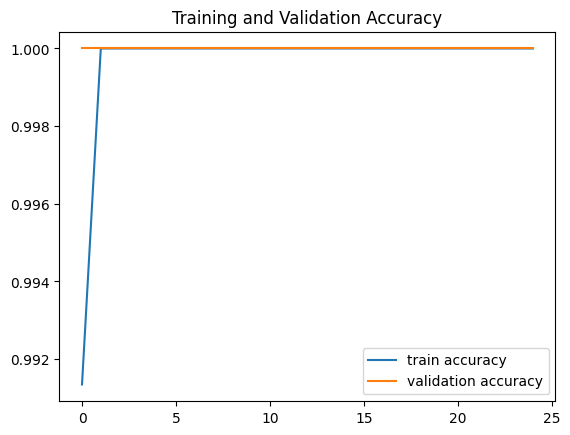

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
# Evaluate the model on test data
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
test_loss, test_acc = cnn_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc}")

# Save the best model as a .h5 file
cnn_model.save('breast_image_model.h5')

print(classification_report)


10/10 [==============================] - 2s 232ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 1.0
<function classification_report at 0x7a692967fd90>


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
test_loss, test_acc = cnn_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc}")


10/10 [==============================] - 2s 231ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 1.0


In [ ]:
# Assuming validation_generator yields (x_test, y_test)
y_pred = cnn_model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Assuming y_true are the true labels from validation_generator
y_true = validation_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

# Print metrics
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)


10/10 [==============================] - 3s 249ms/step
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317



In [ ]:
import pickle

# Assuming 'Logistic Regression' was the best performing model
best_text_model = results['Naive Bayes']['model']

# Save the model as a pickle file
with open('text_input_model.pkl', 'wb') as file:
    pickle.dump(best_text_model, file)


In [ ]:
from tensorflow.keras.models import load_model

# Assuming 'model_cnn' was the best performing CNN model
best_image_model_path = 'breast_image_model.h5'

# Load the model
best_image_model = load_model(best_image_model_path)

# Save the model as a pickle file (not directly possible for keras/tensorflow models, so saving as h5 is common practice)
# Alternatively, you could save the model architecture and weights separately
# best_image_model.save('image_input_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
import pickle

# Load the Keras model
model_h5_path = 'breast_image_model.h5'
model = load_model(model_h5_path)

# Save model architecture as JSON
model_architecture_json = model.to_json()
with open('breast_image_model_architecture.json', 'w') as json_file:
    json_file.write(model_architecture_json)

# Save model weights as pickle
model_weights_pkl_path = 'breast_image_model_weights.pkl'
with open(model_weights_pkl_path, 'wb') as pkl_file:
    pickle.dump(model.get_weights(), pkl_file)


In [ ]:
import pickle
from tensorflow.keras.models import model_from_json

# Load model architecture from JSON
model_architecture_path = 'breast_image_model_architecture.json'
with open(model_architecture_path, 'r') as json_file:
    loaded_model_json = json_file.read()

# Load model weights from pickle
model_weights_path = 'breast_image_model_weights.pkl'
with open(model_weights_path, 'rb') as pkl_file:
    loaded_model_weights = pickle.load(pkl_file)

# Reconstruct the model from architecture and weights
loaded_model = model_from_json(loaded_model_json)
loaded_model.set_weights(loaded_model_weights)

# Optionally, compile the model if needed
# loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now, 'loaded_model' is ready to be used for predictions or further training
